<a href="https://colab.research.google.com/github/santiagoahl/Digit-recognition/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits, make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice
import numpy as np
from numpy.random import rand
import pandas as pd

In [ ]:
mnist = load_digits()

In [ ]:
sample = mnist['images']

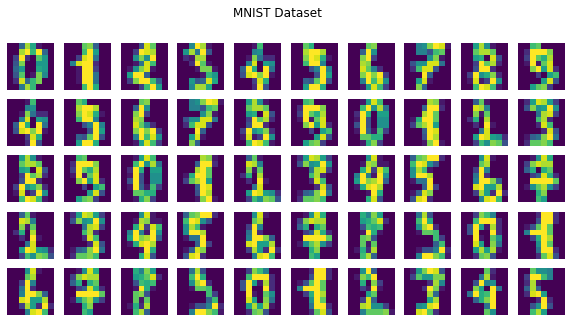

In [ ]:
ncols = 10
nrows = 5
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 5))
for i in range(nrows):
  for j in range(ncols):
    ax[i,j].imshow(sample[i*4+j])
    ax[i,j].set_axis_off()
fig.suptitle('MNIST Dataset')
plt.show()

In [ ]:
data = mnist['data'] # flatten data

In [ ]:
sc = MinMaxScaler()
sc.fit(data)
data = sc.transform(data)

In [ ]:
%run '/content/drive/MyDrive/personal-projects/digit_recognition/k_means.ipynb'

v1.5.8


In [ ]:
predictions = fit_k_means(data=data, k=10, dim=64, max_iter=1000, tolerance=1e-2, mean_bounds=(0, 1.0), live_plot=False, metrics=True)

In [ ]:
k_means = KMeans(k=10)

In [ ]:
k_means.fit(data=mnist['data'], verbose=1, max_iter=100)

Change: 3.9378700848460553 | Loss: 32.66512663590646 
 

Change: 1.6061580498154595 | Loss: 33.71484554226387 
 

Change: 1.3669831849504241 | Loss: 34.131205581469 
 

Change: 1.2308130876694432 | Loss: 34.32943349234224 
 

Change: 1.1451555627219272 | Loss: 34.73437864139908 
 

Change: 1.0897271487689018 | Loss: 34.51388542090593 
 

Change: 1.1212548240867262 | Loss: 34.48725746534828 
 

Change: 1.120907968890653 | Loss: 34.416700400097945 
 

Change: 1.1048132760949887 | Loss: 34.45446927829203 
 

Change: 1.0417285475228086 | Loss: 34.59632196415533 
 

Change: 1.035950014194652 | Loss: 34.8082616475185 
 

Change: 1.0463748980690142 | Loss: 34.40875144514823 
 

Change: 1.075462675429583 | Loss: 34.835257430851186 
 

Change: 1.106714440476121 | Loss: 35.06818686047609 
 

Change: 1.0404433905332984 | Loss: 34.836992545815235 
 

Change: 1.0349568271544505 | Loss: 34.845359097022445 
 

Change: 1.0061269808908961 | Loss: 34.954092025321046 
 

Change: 1.0070407782602433 | Loss

array([9, 6, 6, ..., 6, 2, 2])

In [ ]:
prev = k_means.assignations

In [ ]:
k_means.assignations = prev

In [ ]:
len(k_means.data[0])

64

In [ ]:
df = pd.DataFrame({
    'target':mnist['target'],
    'prediction':k_means.assignations
})

In [ ]:
list(df['target'])

In [ ]:
k_means.assignations

In [ ]:
k_means.sort_assignations(old=list(df['prediction'].drop_duplicates()), targets=list(df['target'].drop_duplicates()))

In [ ]:
k_means.assignations

In [ ]:
df['target'].drop_duplicates()

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: target, dtype: int64

In [ ]:
error=0
for i in range(len(df)):
  if df['target'][i]!=df['prediction'][i]:
    error+=1
error = error/len(df)

In [ ]:
error

0.9821925431274346

In [ ]:
df

,target,prediction
0,0,9
1,1,6
2,2,6
3,3,2
4,4,5
...,...,...
1792,9,2
1793,0,9
1794,8,6
1795,9,2


In [ ]:
error

0.01335559265442404

# TRASH

In [ ]:
l = list(df['prediction'].drop_duplicates())

In [ ]:
from random import choice

In [ ]:
ex = [choice(l) for _ in range(30)]

In [ ]:
ex

[6,
 6,
 2,
 7,
 5,
 6,
 8,
 8,
 5,
 7,
 9,
 2,
 5,
 5,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 8,
 9,
 6,
 2,
 5,
 5,
 6,
 5,
 6]

In [ ]:
m

[0,
 1,
 2,
 3,
 7,
 4,
 6,
 6,
 8,
 9,
 6,
 9,
 3,
 1,
 8,
 7,
 2,
 6,
 8,
 0,
 7,
 2,
 6,
 0,
 1,
 2,
 2,
 4,
 3,
 4]

In [ ]:
def sort_assignations(data, old, targets):
  new = data
  for x in range(len(data)):
    #print('\n')
    observation = data[x]
    #print(f'observation:{observation}')
    for i in range(len(old)):
      #print(i)
      if old[i] == observation:
        #print(f'OK! old:{old[i]}, ob:{observation}')
        new[x] = targets[i]
  return new

In [ ]:
m = sort_assignations(ex,  list(df['prediction'].drop_duplicates()), list(df['target'].drop_duplicates()))

In [ ]:
list(df['target'].drop_duplicates())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
m

[3,
 3,
 0,
 1,
 7,
 3,
 4,
 4,
 7,
 1,
 5,
 0,
 7,
 7,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 4,
 5,
 3,
 0,
 7,
 7,
 3,
 7,
 3]

In [ ]:
pd.DataFrame({'a':ex1, 'd':m})

,a,d
0,5,5
1,4,4
2,7,7
3,5,5
4,3,3
5,4,4
6,7,7
7,0,0
8,5,5
9,4,4


In [ ]:
list(df['target'].drop_duplicates())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
l

[2, 7, 3, 6, 8, 9, 4, 5, 0, 1]

# Blobs

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
d, tar = make_blobs(n_features=2, centers=10, cluster_std=0.4, n_samples=200)

In [ ]:
x = d[:,0]
y = d[:,1]

In [ ]:
da = pd.DataFrame({
    'x' : d[:,0],
    'y' : d[:,1],
    't' : tar
})

In [ ]:
d

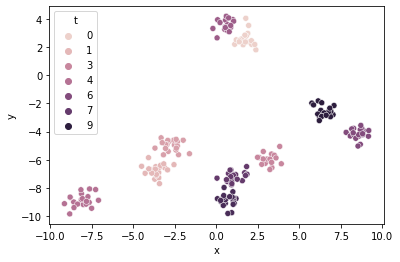

In [ ]:
sns.scatterplot(data=da, x='x', y='y', hue='t')
plt.show()

In [ ]:
k_means_blobs = KMeans(k=10)

In [ ]:
k_means_blobs.fit(data=d, live_plot=False,verbose=0)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[array([0.40903278, 0.11041626]) array([[0.14002795, 0.53760494],
                                        [0.29328366, 0.05693399],
                                        [0.50596605, 0.76019625],
                                        [0.27452675, 0.77694412],
                                        [0.22406486, 0.52945901],
                                        [0.67782284, 0.09339591],
                                        [0.29709933, 0.90789061],
                                        [0.64946379, 0.52215668],
                                        [0.68964221, 0.66986138],
                                        [0.48469392, 0.87345889]])
 array([[0.85264958, 0.38812314],
        [0.16828722, 0.01042393],
        [0.41866336, 0.15694555],
        [0.92997568, 0.98353872],
        [0.17698229, 0.33810518],
        [0.04882405, 0.96043482],
        [0.56758147, 0.19831847],
        [0.41921247, 0.44286643],


KeyboardInterrupt: ignored